In [111]:
#dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 


In [2]:
#importing data from the dataframes 
worldbank_df = pd.read_csv("cleanworlddata.csv") #has country's per capita data from 1960-2016 
eiapercapita_df = pd.read_csv("eia.csv") #has states per capita data from 1990-2018, with percent and absolute changes noted

In [13]:
#cleaning up world data from worldbank 

world_df = worldbank_df.drop(["Indicator Name", "Indicator Code", "Country Code"], axis = 1)
nona_world_df = world_df.dropna() # this will drop any countries with missing data from any of the year, so will keep countries with complete data in the time period
nona_world_df = nona_world_df.set_index('Country Name') # such that calling specific ie. US will be easier 

average_emission = nona_world_df.T.mean()

world_90_16 = world_df[['Country Name','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014','2015','2016']]#might be useful in comparison to PA data does not have 2017-2018 that state has isolation 
w_nona_ns = world_90_16.set_index('Country Name').dropna() #dropping countries with na values 

world_ten14 = world_df[['Country Name','2010', '2011', '2012', '2013', '2014']] # this is isolating the world data to look at just 2010-2014 period for later comparison
w_nona_tf = world_ten14.dropna() #dropping countries with na values



US_all = nona_world_df.loc['United States'] # Just the US CO2 emission per capita
US_ten14 = nona_world_df.loc['United States', ['2010','2011', '2012','2013','2014']] # US 2010-2014 emission


In [4]:
#Lets Clean up the EIA Data: holds data per capita for each state from 1990 - 2018 
eiapercapita_df.head()

# LOOKING AT IT OVERALL 
percent_absolute = eiapercapita_df[['State','1990-2018 Percent','1990-2018 Absolute', '1990-2018 Percent.1', '1990-2018 Absolute.1' ]] #isolating these columns to be dropped later from the dataframe
percent_absolute = percent_absolute.rename(columns = {'1990-2018 Percent.1':'2017-2018 Percent', '1990-2018 Absolute.1':'2017-2018 Absolute'}) #renaming these columns because the column heading is wrong for the last two columns 
PA_perAbs = percent_absolute.iloc[38, :]
print(PA_perAbs) # This is only important to highlight PA's overall change and isolated year change from 2017-18

State                 Pennsylvania
1990-2018 Percent          -21.90%
1990-2018 Absolute            -4.9
2017-2018 Percent            1.60%
2017-2018 Absolute             0.3
Name: 38, dtype: object


In [5]:
# For more details 
eia = eiapercapita_df.set_index("State") # reindexing by state's name 
eia = eia.drop(['1990-2018 Percent','1990-2018 Absolute', '1990-2018 Percent.1', '1990-2018 Absolute.1'], axis=1) #droping the total change and report
PA_all = eia.loc['Pennsylvania'] # isolating just PA's data for the time period
PA_ten14 = eia.loc['Pennsylvania', ['2010','2011', '2012','2013','2014']] #PA just 2010-2014 

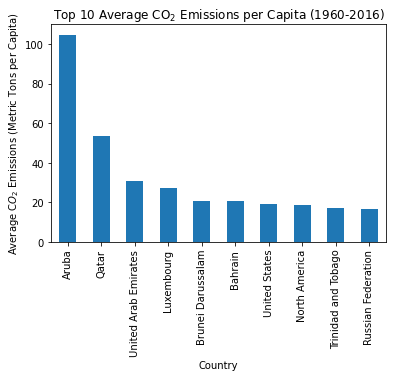

In [103]:
#Visualizing 

#Top 10 Average for all countires with complete data
top_ten_measured = average_emission.sort_values(ascending=False).head(10) #average emission over 56 years top 10 per capita
top_ten_measured.plot.bar()
plt.ylabel("Average C$O_2$ Emissions (Metric Tons per Capita)")
plt.xlabel('Country')
plt.title("Top 10 Average CO$_2$ Emissions per Capita (1960-2016)") # Note this removed any countires without complete data.
plt.savefig('top10sixtiestosixteen.png')
#United States is 7th 

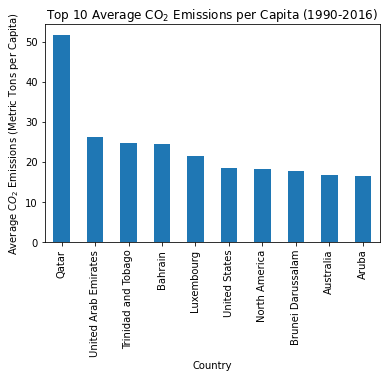

In [104]:
# Top 10 average C02 emission per capita 1990 - 2016
average_nsixteen = w_nona_ns.T.mean().sort_values(ascending=False).head(10) #
average_nsixteen.plot.bar()
plt.ylabel("Average C$O_2$ Emissions (Metric Tons per Capita)")
plt.xlabel('Country')
plt.title("Top 10 Average CO$_2$ Emissions per Capita (1990-2016)") # Note this removed any countires without complete data.
plt.savefig('top10avg1990_2016.png')

# US moved to 6th place

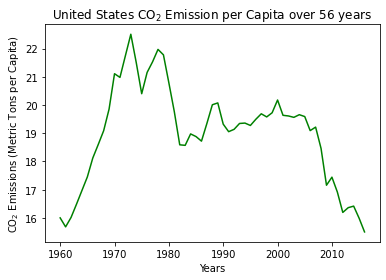

In [105]:
# United States Emission 1960-2016
US_all.plot.line(color ="green")

plt.xlabel("Years")
plt.ylabel("CO$_2$ Emissions (Metric Tons per Capita)")
plt.title("United States CO$_2$ Emission per Capita over 56 years")

plt.savefig('usemmissionover56years.png')


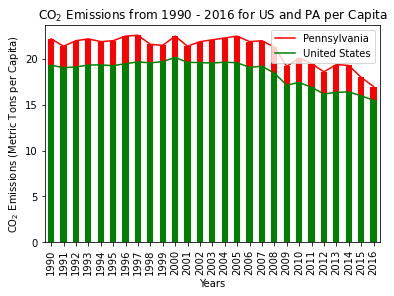

In [106]:
# US and PA comparison from 1990 - 2016

PA_all[:27].plot.line(color='red', legend='PA')
US_all[30:,].plot.line(color='green', legend = 'United States')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.xlabel('Years')
plt.title('CO$_2$ Emissions from 1990 - 2016 for US and PA per Capita')
PA_all[:27].plot.bar(color='red')
US_all[30:,].plot.bar(color='green')

plt.savefig('USandPAcomparion1990_2016.png')


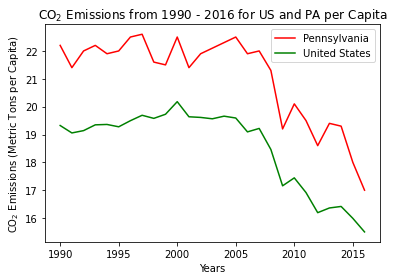

In [107]:
# Same as above just different way to visualize it

PA_all[:27].plot.line(color='red', legend='PA')
US_all[30:,].plot.line(color='green', legend = 'United States')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.xlabel('Years')
plt.title('CO$_2$ Emissions from 1990 - 2016 for US and PA per Capita')

plt.savefig('USandPAcomparion1990_2016_without_bar.png')


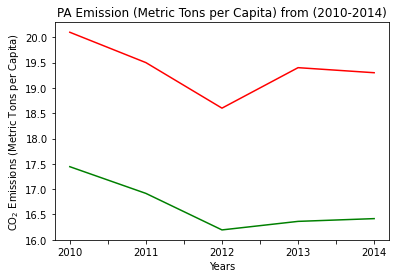

In [108]:
#PA 2010 - 2014 for comparison

PA_ten14.plot.line(color ='red')
US_all[50:55].plot.line(color='green')
plt.xlabel('Years')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.title("PA Emission (Metric Tons per Capita) from (2010-2014)")

plt.savefig('USandPAcomparion2010_2014.png')


#note the unusal dip at 2012 that megan also mentioned in her plot 

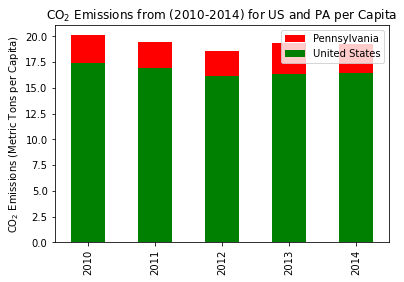

In [109]:
PA_ten14.plot.bar(color='red', legend="PA")
US_all[50:55].plot.bar(color='green' ,legend='US')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.title('CO$_2$ Emissions from (2010-2014) for US and PA per Capita')

plt.savefig('USandPAcomparion2010_2014_with_bar.png')
